In [1]:
#def plan 
#1.데이터를 전부 뽑아서 같은 라인에 세워 놓기
#2.데이터 중앙을 맞추기
#3.데이터 절댓값 구하기 및 전부 올리기 
#4. 전부 더하기 
#5. 편차 값 분석하기

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import math
from tqdm import tqdm


In [3]:
swing_dir = ['swing/back_cut','swing/back_drive','swing/back_short','swing/back_smash','swing/fo_cut','swing/fo_drive','swing/fo_short','swing/fo_smash']
sensor_axis = ['AX','AY','AZ']

file_name_dir = []

for root,dirs,files in os.walk('swing/back_cut'):
    for fname in files:
        full_name = os.path.join(root,fname)
        file_name_dir.append(full_name)
print(len(file_name_dir))

1429


In [7]:
total_diff = []
for file in tqdm(file_name_dir):
    data = open(file,'r').read().split('\n')
    data.pop(0) # remove trash index
    index = data.pop(0) # get real_index
    real_data = []
    
    for tmp in range(len(data)):
        if data[tmp] == '':
            continue
        real_data.append(data[tmp].split(','))
        
    df = pd.DataFrame(real_data)
    index_li = index.split(',')
    df.columns = index_li
    
    for y in index_li:
        df[y] = pd.to_numeric(df[y],downcast='float')
        
    #make dataFrame Complete
    diff = [0 for x in range(len(df))]
    ind = [x for x in range(len(df))]
    for tmp in sensor_axis:
        st = df[tmp][0]
        tar = list(df[tmp])
        for x in range(len(tar)):
            tar[x]-=st
        diff+=np.abs(tar)
    total_diff.append(diff) 
    
    
    
    

        
        


100%|██████████| 1429/1429 [00:06<00:00, 232.74it/s]


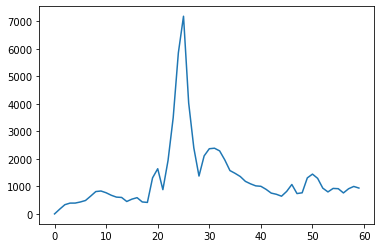

In [8]:
plt.figure()
plt.plot(ind,total_diff[0])
plt.show()

In [9]:
sum_diff = []
for tmp in total_diff:
    sum_diff.append(sum(tmp))


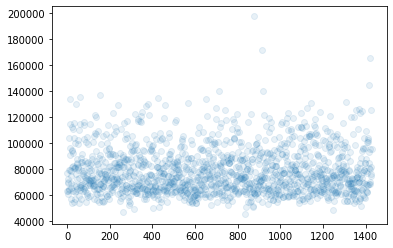

82206.1


In [14]:
li = [x for x in range(len(sum_diff))]
plt.figure()
plt.scatter(li,sum_diff,alpha=0.1)
plt.show()

print((np.percentile(sum_diff,10)+np.percentile(sum_diff,90))/2)

Load file in folder complete....
swing/back_cut mean : 118375.41917424773 10 min :  98317.8


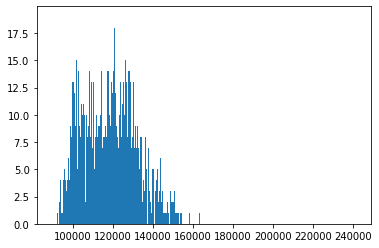

Load file in folder complete....
swing/back_drive mean : 186821.07074569789 10 min :  143901.6


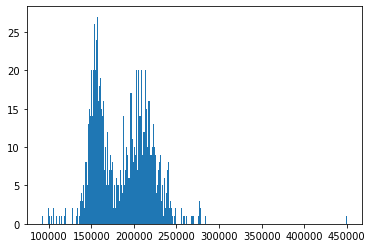

Load file in folder complete....
swing/back_short mean : 123695.96413199426 10 min :  108538.0


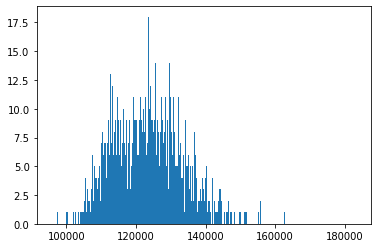

Load file in folder complete....
swing/back_smash mean : 181452.74948096887 10 min :  140113.2


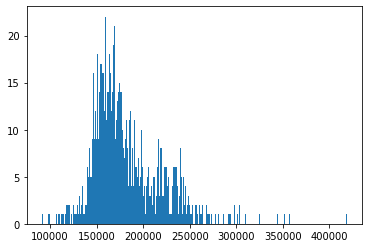

Load file in folder complete....
swing/fo_cut mean : 117131.45647236942 10 min :  101935.0


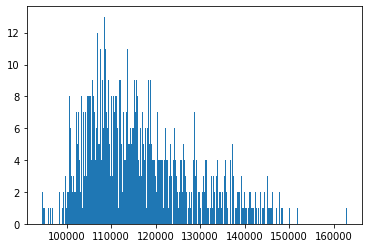

Load file in folder complete....
swing/fo_drive mean : 232348.48558999455 10 min :  115609.4


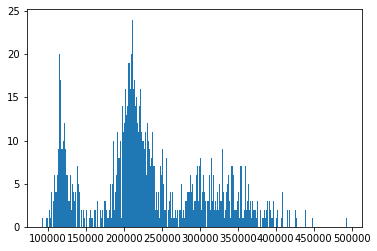

Load file in folder complete....
swing/fo_short mean : 146414.89705882352 10 min :  120583.7


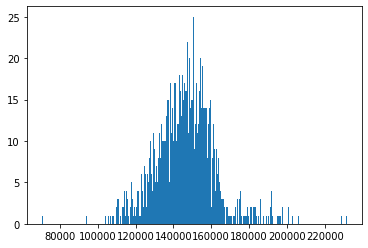

Load file in folder complete....
swing/fo_smash mean : 223852.35250917994 10 min :  116021.0


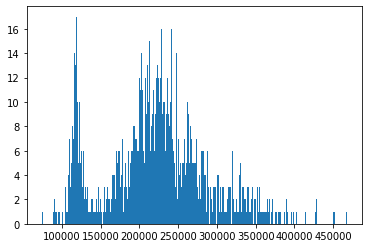

In [30]:
swing_dir = ['swing/back_cut','swing/back_drive','swing/back_short','swing/back_smash','swing/fo_cut','swing/fo_drive','swing/fo_short','swing/fo_smash']
sensor_axis = ['AX','AY','AZ']

for swing in swing_dir:
    per_swing = []
    file_name_dir = []
    
    for root,dirs,files in os.walk(swing):
        for fname in files:
            fullname = os.path.join(root,fname)
            file_name_dir.append(fullname)
    
    print('Load file in folder complete....')
    
    for file in file_name_dir:
        data = open(file,'r').read().split('\n')
        data.pop(0)
        index = data.pop(0)
        index = index.split(',')
        
        real_data = []
        
        for tmp in range(len(data)):
            if data[tmp] == '':
                continue
            real_data.append(data[tmp].split(',')) 
        df = pd.DataFrame(real_data)
        df.columns = index
        
        for y in index:
            df[y] = pd.to_numeric(df[y],downcast='float')
        
        tmp_number = 0
        for axis in sensor_axis:
            ax_li = list(df[axis])
            
            for x in range(len(df)):
                ax_li[x]-=ax_li[0]
            tmp_number+=sum(np.abs(ax_li))
            #add ax ay az with whole data
        
        per_swing.append(tmp_number)
    print(swing ,'mean :',np.mean(per_swing),'10 min : ',np.percentile(per_swing,5))
    l = [x for x in range(len(per_swing))]
    plt.figure()
    plt.hist(per_swing,bins=500)
    
    plt.show()
        
        

In [31]:
import matplotlib.pylab as plt
import matplotlib as mpl
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data
import fix_yahoo_finance
fix_yahoo_finance.pdr_override()

In [32]:
chart_data = data.get_data_yahoo('005930.KS','2021-01-01','2021-02-02')
chart_data

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,81000.0,84400.0,80200.0,83000.0,83000.0,38655276
2021-01-05,81600.0,83900.0,81600.0,83900.0,83900.0,35335669
2021-01-06,83300.0,84500.0,82100.0,82200.0,82200.0,42089013
2021-01-07,82800.0,84200.0,82700.0,82900.0,82900.0,32644642
2021-01-08,83300.0,90000.0,83000.0,88800.0,88800.0,59013307
2021-01-11,90000.0,96800.0,89500.0,91000.0,91000.0,90306177
2021-01-12,90300.0,91400.0,87800.0,90600.0,90600.0,48682416
2021-01-13,89800.0,91200.0,89100.0,89700.0,89700.0,36068848
2021-01-14,88700.0,90000.0,88700.0,89700.0,89700.0,26393970


In [33]:
def getdata(code,date_from,date_to):
    chart_data = data.get_data_yahoo(code,date_from,date_to)
    return chart_data

samsung = getdata('005930.KS','2020-01-01','2021-02-03')

[*********************100%***********************]  1 of 1 downloaded


In [34]:
samsung

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,55500.0,56000.0,55000.0,55200.0,52770.64,12993228
2020-01-03,56000.0,56600.0,54900.0,55500.0,53057.43,15422255
2020-01-06,54900.0,55600.0,54600.0,55500.0,53057.43,10278951
2020-01-07,55700.0,56400.0,55600.0,55800.0,53344.23,10009778
2020-01-08,56200.0,57400.0,55900.0,56800.0,54300.22,23501171
...,...,...,...,...,...,...
2021-01-27,86600.0,87700.0,85600.0,85600.0,85600.00,26423070
2021-01-28,83200.0,85600.0,83200.0,83700.0,83700.00,31859808
2021-01-29,84500.0,85000.0,82000.0,82000.0,82000.00,39615978


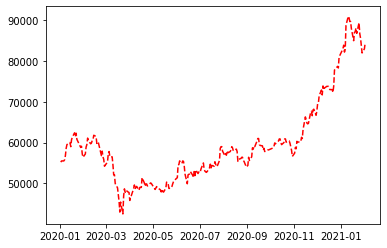

In [36]:
plt.figure()
plt.plot(samsung['Close'],ls='--',color='red')
plt.show()